## Import Packages

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import missingno as msno
import seaborn as sns

DATA_DIR = os.path.join("..", "data", "cs-train")
print(DATA_DIR)

..\data\cs-train


## Import Data

In [2]:
df = pd.DataFrame()

data_filenames = [f for f in os.listdir(DATA_DIR) if os.path.isfile(os.path.join(DATA_DIR, f))]
data_filenames = sorted(data_filenames)

print(data_filenames)

for filename in data_filenames:
    invoice_filename = os.path.join(DATA_DIR, filename)
    invoice_df = pd.read_json(invoice_filename)
    
    # Rename column names where applicable
    invoice_df = invoice_df.rename(columns={
        'total_price': 'price',
        'StreamID': 'stream_id',
        'TimesViewed': 'times_viewed'
    })
    
    df = df.append(invoice_df)

['invoices-2017-11.json', 'invoices-2017-12.json', 'invoices-2018-01.json', 'invoices-2018-02.json', 'invoices-2018-03.json', 'invoices-2018-04.json', 'invoices-2018-05.json', 'invoices-2018-06.json', 'invoices-2018-07.json', 'invoices-2018-08.json', 'invoices-2018-09.json', 'invoices-2018-10.json', 'invoices-2018-11.json', 'invoices-2018-12.json', 'invoices-2019-01.json', 'invoices-2019-02.json', 'invoices-2019-03.json', 'invoices-2019-04.json', 'invoices-2019-05.json', 'invoices-2019-06.json', 'invoices-2019-07.json']


In [3]:
df

,country,customer_id,invoice,price,stream_id,times_viewed,year,month,day
0,United Kingdom,13085.0,489434,6.95,85048,12,2017,11,28
1,United Kingdom,NaN,489597,8.65,22130,1,2017,11,28
2,United Kingdom,NaN,489597,1.70,22132,6,2017,11,28
3,United Kingdom,NaN,489597,1.70,22133,4,2017,11,28
4,United Kingdom,NaN,489597,0.87,22134,1,2017,11,28
...,...,...,...,...,...,...,...,...,...
42013,United Kingdom,15628.0,562163,0.85,21544,12,2019,7,31
42014,United Kingdom,15628.0,562163,1.95,47591D,8,2019,7,31
42015,United Kingdom,15628.0,562163,0.83,23167,12,2019,7,31
42016,United Kingdom,15628.0,562163,4.95,22138,3,2019,7,31


In [4]:
# Convert year, month, day to a datetime column
df["date"] = pd.to_datetime(df.year*10000+df.month*100+df.day, format='%Y%m%d')
df = df.drop(columns=['year', 'month', 'day'])
df

,country,customer_id,invoice,price,stream_id,times_viewed,date
0,United Kingdom,13085.0,489434,6.95,85048,12,2017-11-28
1,United Kingdom,NaN,489597,8.65,22130,1,2017-11-28
2,United Kingdom,NaN,489597,1.70,22132,6,2017-11-28
3,United Kingdom,NaN,489597,1.70,22133,4,2017-11-28
4,United Kingdom,NaN,489597,0.87,22134,1,2017-11-28
...,...,...,...,...,...,...,...
42013,United Kingdom,15628.0,562163,0.85,21544,12,2019-07-31
42014,United Kingdom,15628.0,562163,1.95,47591D,8,2019-07-31
42015,United Kingdom,15628.0,562163,0.83,23167,12,2019-07-31
42016,United Kingdom,15628.0,562163,4.95,22138,3,2019-07-31


In [5]:
# Set country to a categorical type
df['country'] = df['country'].astype('category')
df['invoice'] = df['invoice'].astype('category')
df['customer_id'] = df['customer_id'].astype('category')
df['stream_id'] = df['stream_id'].astype('category')

# Reorder columns
df = df[['date', 'price', 'times_viewed', 'stream_id', 'country', 'customer_id', 'invoice']]

# Remove outliers
df = df[df['price'].between(df['price'].quantile(0.02), df['price'].quantile(0.98))]
    
df

,date,price,times_viewed,stream_id,country,customer_id,invoice
0,2017-11-28,6.95,12,85048,United Kingdom,13085.0,489434
1,2017-11-28,8.65,1,22130,United Kingdom,NaN,489597
2,2017-11-28,1.70,6,22132,United Kingdom,NaN,489597
3,2017-11-28,1.70,4,22133,United Kingdom,NaN,489597
4,2017-11-28,0.87,1,22134,United Kingdom,NaN,489597
...,...,...,...,...,...,...,...
42013,2019-07-31,0.85,12,21544,United Kingdom,15628.0,562163
42014,2019-07-31,1.95,8,47591D,United Kingdom,15628.0,562163
42015,2019-07-31,0.83,12,23167,United Kingdom,15628.0,562163
42016,2019-07-31,4.95,3,22138,United Kingdom,15628.0,562163


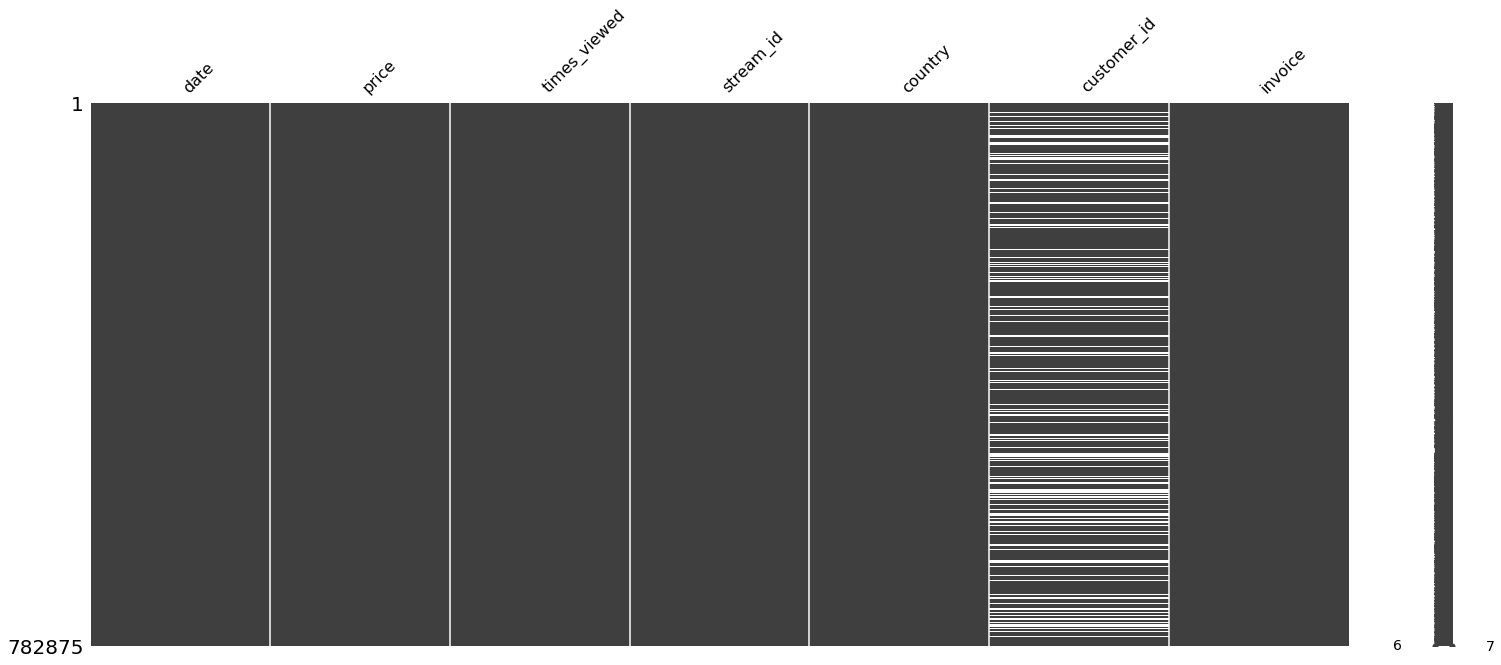

In [6]:
msno.matrix(df)
plt.show()

In [7]:
df['invoice'].value_counts()

537434    1298
538071    1250
537638    1170
537823    1148
536876    1146
          ... 
499154       0
551459       0
499156       0
499157       0
525339       0
Name: invoice, Length: 42646, dtype: int64

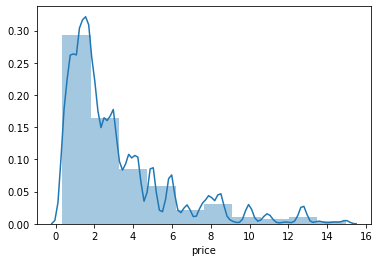

In [8]:
sns.distplot(df['price'], bins=10);

(0.0, 5e-17)

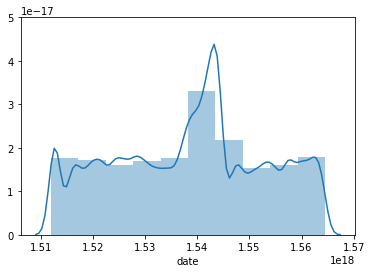

In [9]:
sns.distplot(df['date'], bins=10);
plt.ylim(0,5e-17)
# plt.show()

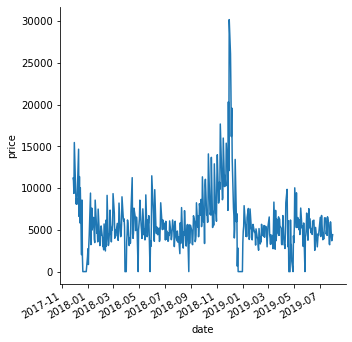

In [10]:
g = sns.relplot(x='date', y='price', data=df.groupby(pd.Grouper(key='date', freq='B')).sum().reset_index(), kind='line')
g.fig.autofmt_xdate()

In [11]:
revenue_by_country = df[['country', 'price']].groupby('country').sum().sort_values('price', ascending=False)
revenue_by_country = revenue_by_country.rename(columns={'price': 'revenue'})
revenue_by_country = revenue_by_country.reset_index()
revenue_by_country.head()

,country,revenue
0,United Kingdom,2.293894e+06
1,EIRE,4.399854e+04
2,Germany,3.425095e+04
3,France,2.401081e+04
4,Netherlands,8.428490e+03


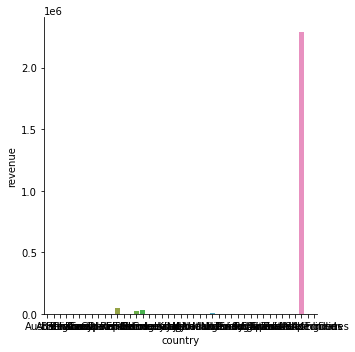

In [14]:
sns.catplot(x='country', y='revenue', data=revenue_by_country[:5], kind='bar')
plt.show()

In [15]:
revenue_by_country

,country,revenue
0,United Kingdom,2.293894e+06
1,EIRE,4.399854e+04
2,Germany,3.425095e+04
3,France,2.401081e+04
4,Netherlands,8.428490e+03
5,Spain,7.431480e+03
6,Switzerland,6.362150e+03
7,Belgium,5.612930e+03
8,Portugal,4.826680e+03
9,Channel Islands,4.624490e+03


In [17]:
df['country'].value_counts()

United Kingdom          722329
EIRE                     12992
Germany                  12593
France                    9228
Netherlands               3891
Spain                     2483
Switzerland               2221
Belgium                   2008
Portugal                  1743
Australia                 1495
Channel Islands           1221
Sweden                    1089
Italy                     1004
Cyprus                     878
Norway                     724
Finland                    702
Austria                    675
Greece                     612
Unspecified                599
Denmark                    553
Japan                      500
United Arab Emirates       435
Poland                     424
Singapore                  291
Hong Kong                  265
USA                        263
Canada                     212
Malta                      210
Iceland                    193
Lithuania                  188
Israel                     137
Bahrain                    126
RSA     